<a href="https://colab.research.google.com/github/sdhar2020/Visualization-Exploratory-Analysis/blob/master/NYC_School_SAT_Step_2_Visualizing_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization & Analysis


In [ ]:
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
  Created wheel for basemap: filename=basemap-1.1.0-cp36-cp36m-linux_x86_64.whl size=121632036 sha256=5190acf4302cbfce15a42e29f14f9aeabd333546d2d702b745d8b1d6d1a5fc43
  Stored in directory: /tmp/pip-ephem-wheel-cache-q6v2llui/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
Successfully built basemap


## Importing pkl data

In [ ]:
# Mount Google Drive
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
folder = "/content/drive/My Drive/Data/NYC School Data/2011 data files online/"
fileout = folder+'combined.pkl'
combined =pd.read_pickle(fileout)
combined.shape

(363, 2161)

## Variables & Type
Sorting numeric, non-numeric etc variales into individual lists for furthr analysis


In [ ]:
# Looks like we missed out some numerics. Converted to numeric with the ignore clause on errors such that the lierals don't get set to NaN
combined = combined.apply(lambda x: pd.to_numeric(x, errors= 'ignore'))

In [ ]:
num_vars= combined.dtypes[combined.dtypes != 'object'].index.to_list()
char_vars= combined.dtypes[combined.dtypes == 'object'].index.to_list()
print(combined[num_vars].head(2).transpose())


                                          0            1
sat_critical_reading_avg_score   355.000000   383.000000
sat_math_avg_score               404.000000   423.000000
sat_writing_avg_score            363.000000   366.000000
sat_score                       1122.000000  1172.000000
ap_test_takers_                  129.028846    39.000000
...                                     ...          ...
priority09                         0.000000     0.000000
priority10                         0.000000     0.000000
lat                               40.713764    40.712332
long                             -73.985260   -73.984797
school_dist                        1.000000     1.000000

[2087 rows x 2 columns]


Text(954.4000000000001, 66.36, 'Median: 1193.00')

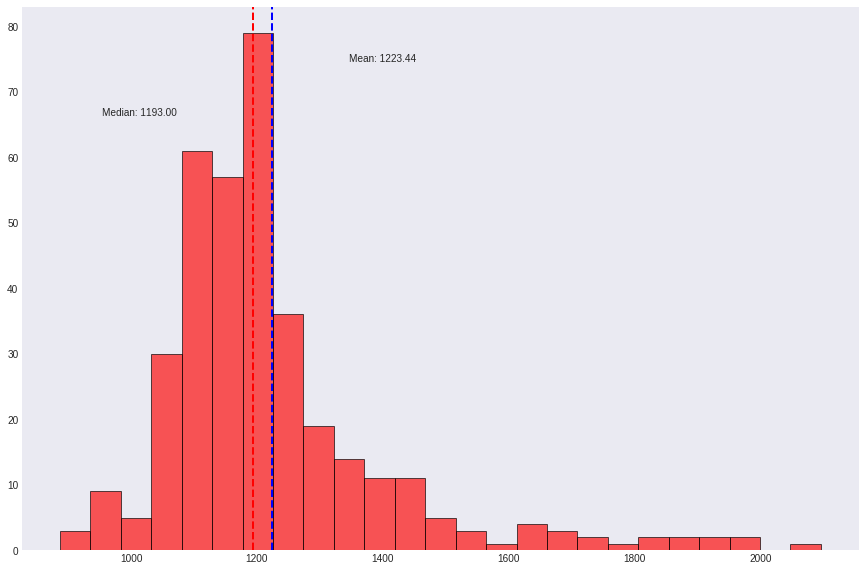

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))
sathist = plt.hist(combined['sat_score'], bins=25, color='r', edgecolor='k', alpha=0.65)
plt.axvline(combined['sat_score'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(combined['sat_score'].median(), color='r', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(combined['sat_score'].mean()*1.1, max_ylim*.9, 'Mean: {:.2f}'.format(combined['sat_score'].mean()))
plt.text(combined['sat_score'].median()*.8, max_ylim*0.8, 'Median: {:.2f}'.format(combined['sat_score'].median()))

## Correlations
Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are).

## Highest Correlation Absolute Values > .6

In [ ]:
combined['total_enrollment']= pd.to_numeric(combined['total_enrollment'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


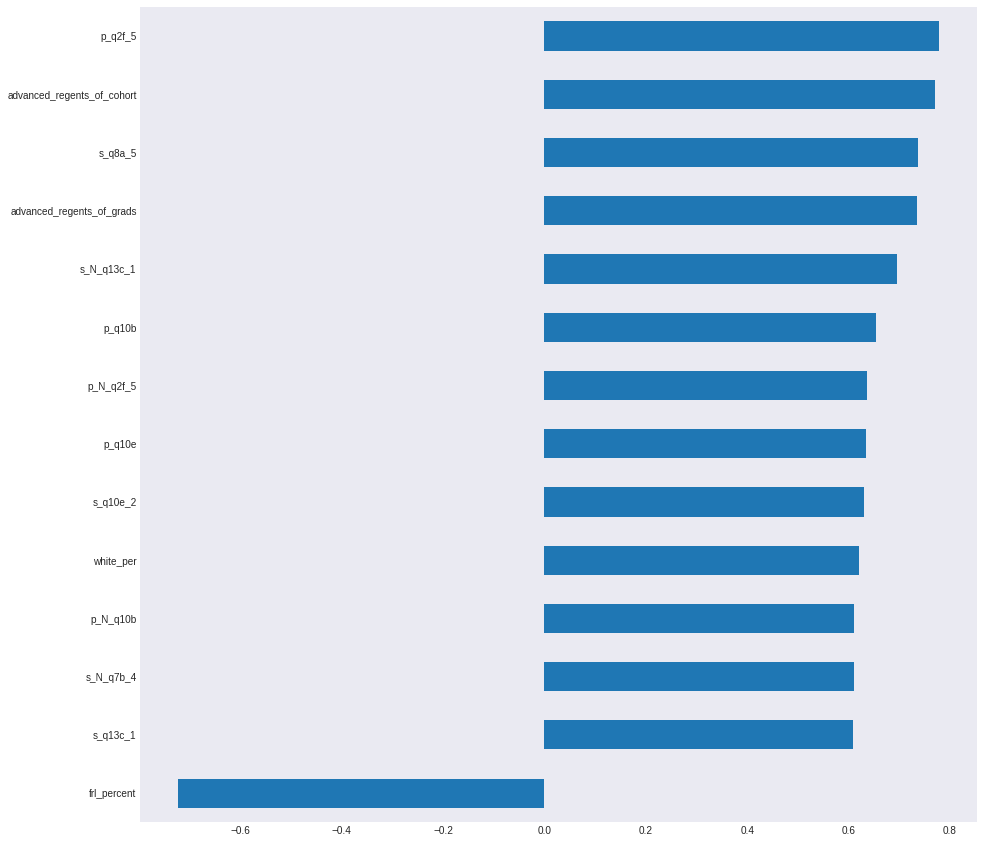

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (15.0, 15.0)
correlations = combined.corr()
corrs = correlations['sat_score']
idx= [i for i in corrs.index if 'sat' not in i]
corrs.loc[idx][abs(corrs)> 0.6].sort_values(ascending=True).plot(kind='barh')

## Survey Data Fields


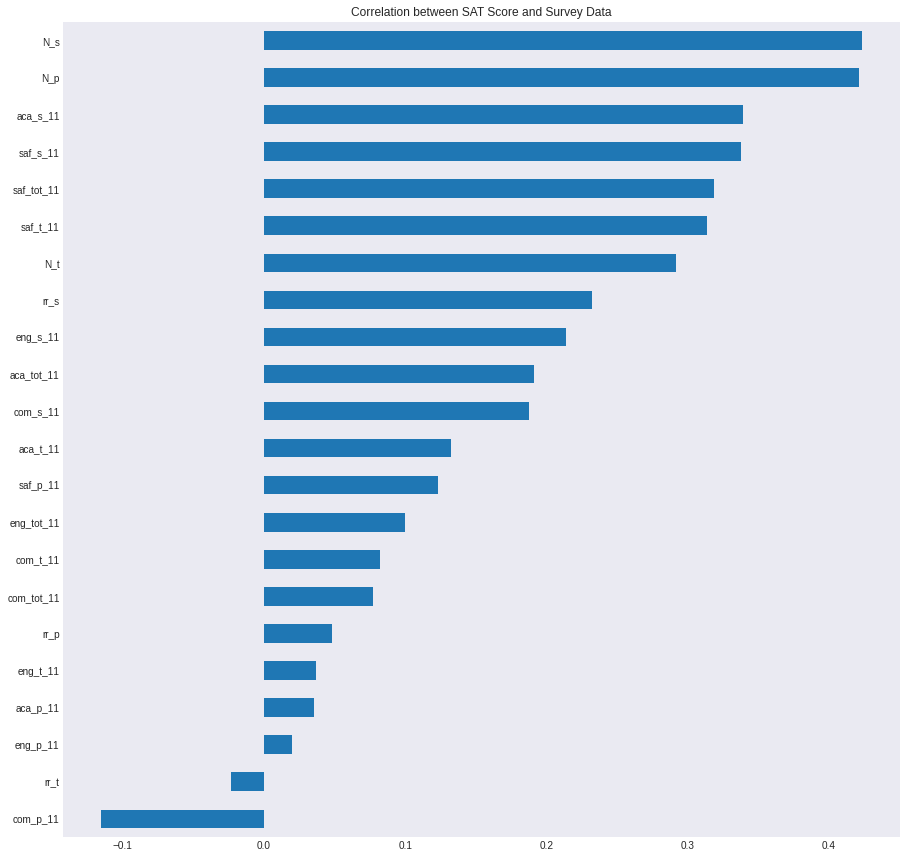

In [ ]:
survey_fields = [ 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

correlations['sat_score'].loc[survey_fields].sort_values(ascending= True).\
plot(kind= 'barh', sort_columns= True,title= 'Correlation between SAT Score and Survey Data')

The top 5 survey fields with highest correlations are as follows:
- Number of student respondents
- Number of parent respondents
- Academic expectations score based on student responses
- Safety and Respect score based on student responses
- Safety and Respect total score

Number 5 is perhaps a composite score and needs to be replaved by Nuber of teacher respondents. All of this indicates need for a engaging school environment where students and parents care about their academic future

We noticed that saf_t_11 and saf_s_11, which measure how teachers and students perceive safety at school, correlated highly with sat_score

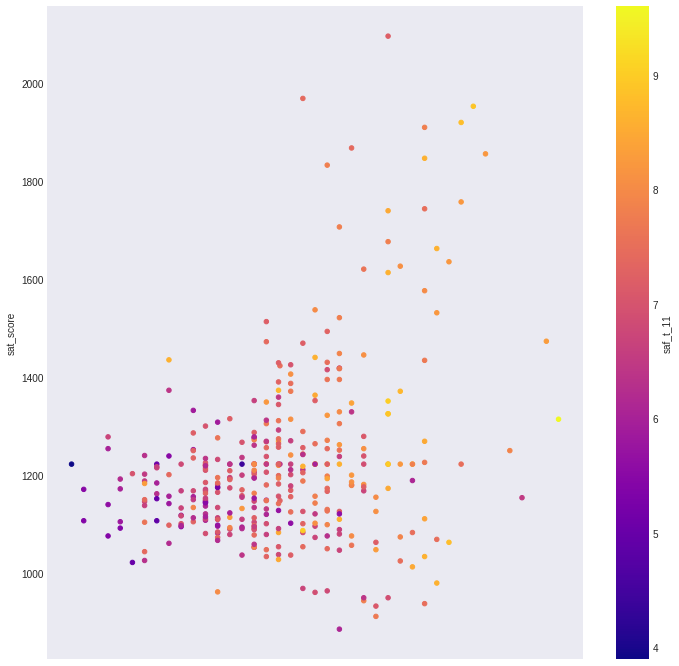

In [ ]:
combined.plot(x='saf_s_11', y = 'sat_score', kind= 'scatter', figsize= (12,12),\
              c= 'saf_t_11', colormap= 'plasma')

In [ ]:
sch_dist_saf_s_11=combined.groupby('school_dist').agg(np.mean)
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(15,15))

# m = Basemap(
#     projection = 'merc',
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#D3D3D3')
# m.drawcoastlines(color='#6D5F47', linewidth=.8)
# m.drawrivers(color='#6D5F47', linewidth=.8)

# longitudes = sch_dist_saf_s_11["long"].tolist()
# latitudes = sch_dist_saf_s_11["lat"].tolist()
# m.scatter(longitudes, latitudes, s=100, zorder=2, latlon=True,c=sch_dist_saf_s_11["saf_s_11"], \
#           cmap="plasma")

<Figure size 1080x1080 with 0 Axes>

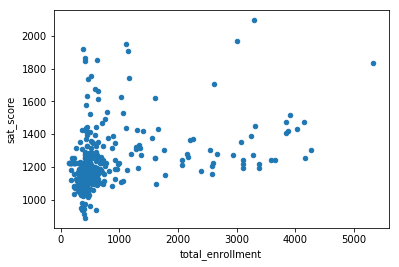

In [ ]:
plt.figure(figsize=(15,15))
combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. 

In [ ]:
e_flg= combined['total_enrollment'] < 1000.0 
s_flg= combined['sat_score'] < 1000.0

es_flg= e_flg & s_flg

low_enrollment= combined[es_flg]
low_enrollment['school_name']

91                  International Community High School
125                 Academy for Language and Technology
126                     Bronx International High School
139               Kingsbridge International High School
141               International School for Liberal Arts
176    Pan American International High School at Monroe
179                       High School of World Cultures
188                  Brooklyn International High School
225       International High School at Prospect Heights
237                          It Takes a Village Academy
253                           Multicultural High School
286              Pan American International High School
Name: school_name, dtype: object

Sadly appears to be minority areas with low enrollment and high diversity areas


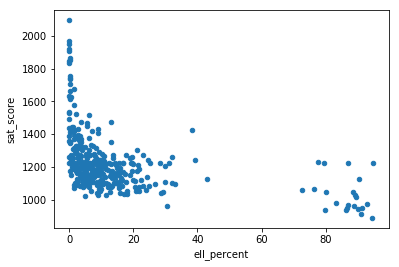

In [ ]:
combined.plot.scatter(x="ell_percent", y="sat_score")
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

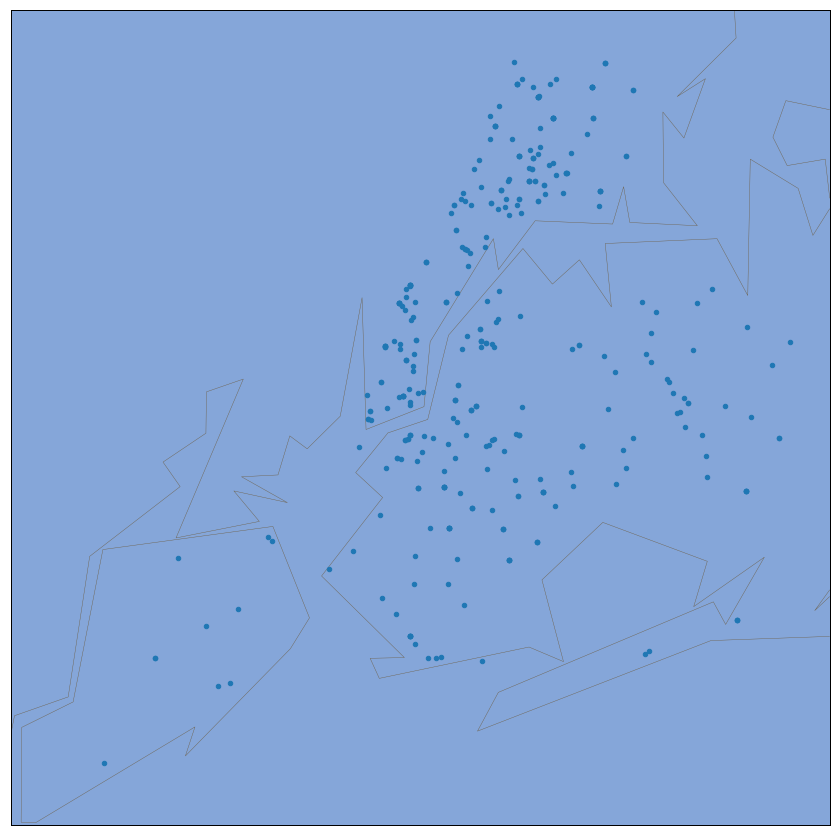

In [ ]:
m = Basemap(
    projection = 'merc',
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
plt.figure(figsize=(15,15))
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
longitudes = combined["long"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

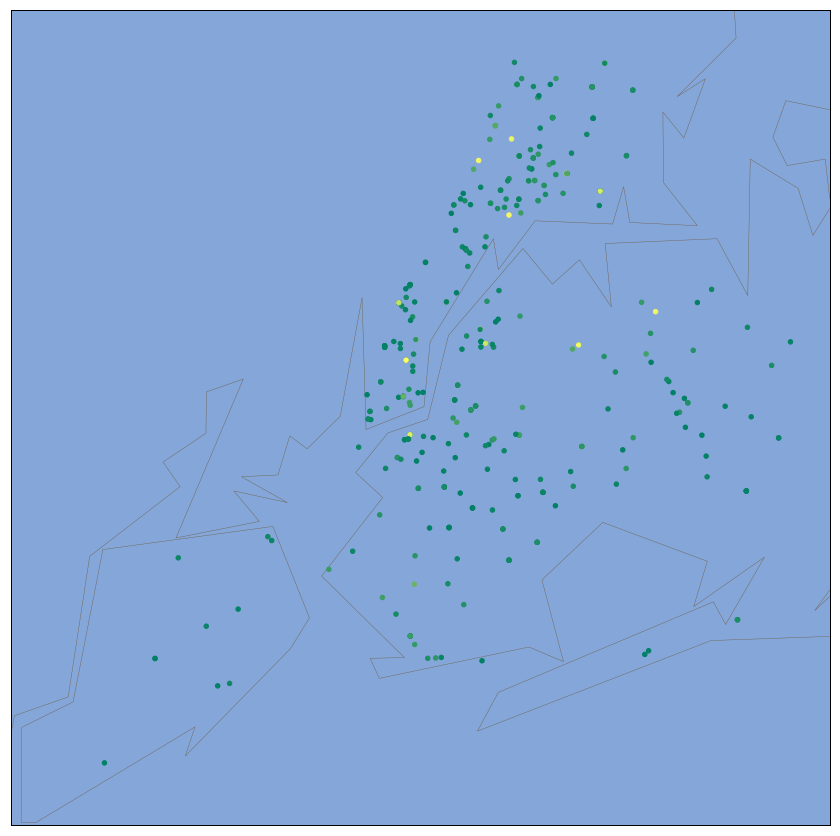

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection = 'merc',
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
plt.figure(figsize=(15,15))
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["long"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot ell_percent

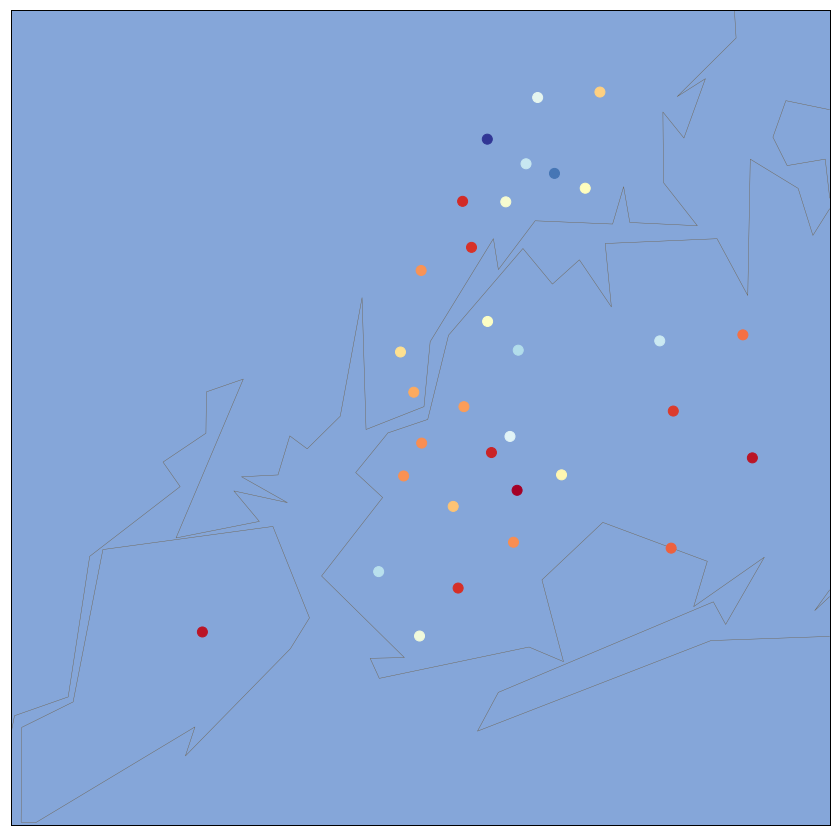

In [ ]:
import numpy as np

districts= combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace= True)

m = Basemap(
    projection = 'merc',
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
plt.figure(figsize=(15,15))
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["long"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=100, zorder=2, latlon=True, c=districts["ell_percent"], cmap="RdYlBu")
plt.show()


## Student Population Composition
The student composition may have impact on the the SAT score. We are going to look at the compostion percentage composition of the students to understand impact of composition on SAT score

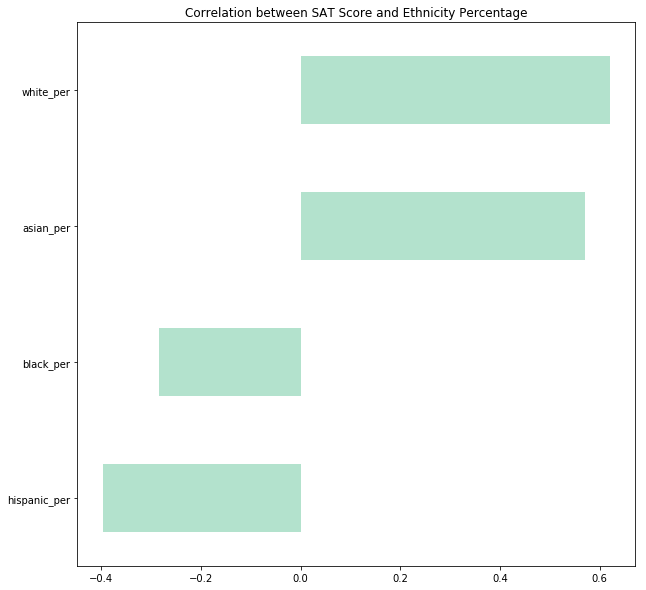

In [ ]:
race_pcntg = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
correlations[race_pcntg].sort_values(ascending= True)\
.plot(kind= 'barh', colormap= 'Pastel2',sort_columns= True,figsize= (10,10),\
      title= 'Correlation between SAT Score and Ethnicity Percentage')

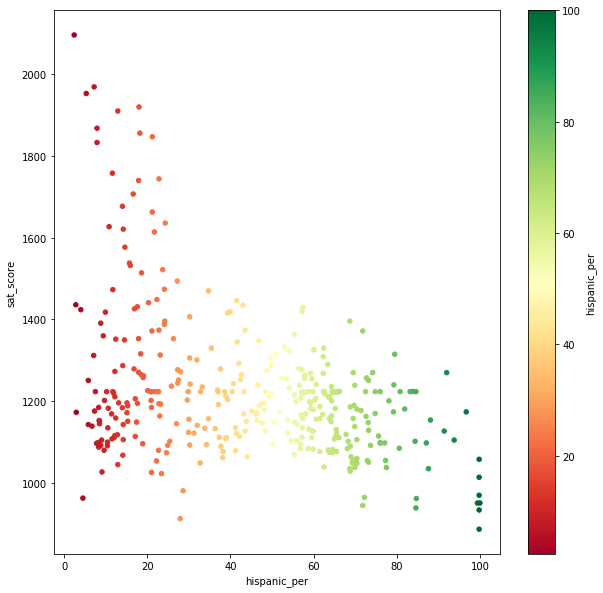

In [ ]:
fig, ax = plt.subplots()

combined.plot(x='hispanic_per', y = 'sat_score', kind= 'scatter', figsize= (10,10),\
              c= 'hispanic_per', colormap= 'RdYlGn', ax= ax)

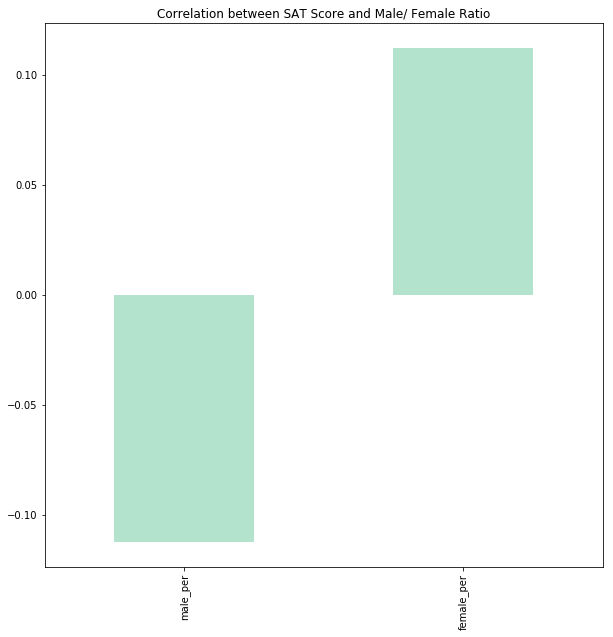

In [ ]:
lst = ['male_per', 'female_per']
correlations[lst].sort_values(ascending= True)\
.plot(kind= 'bar', colormap= 'Pastel2',sort_columns= True,figsize= (10,10),\
      title= 'Correlation between SAT Score and Male/ Female Ratio')

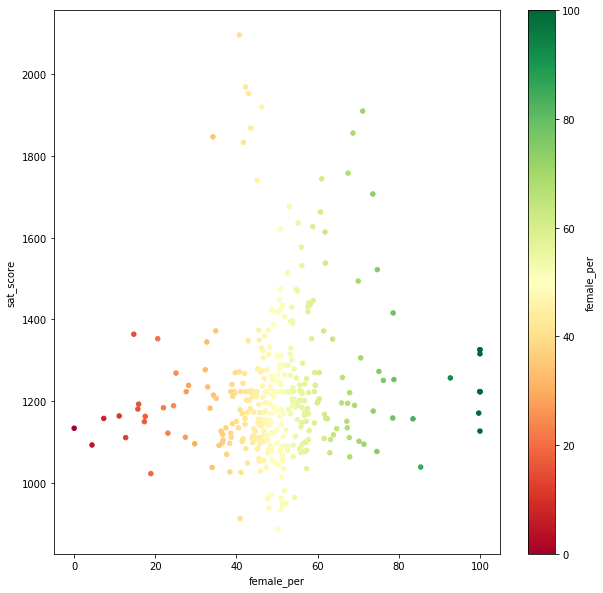

In [ ]:
fig, ax = plt.subplots()

combined.plot(x='female_per', y = 'sat_score', kind= 'scatter', figsize= (10,10),\
              c= 'female_per', colormap= 'RdYlGn', ax= ax)

## Visible Segments


In [ ]:
h_log= combined['hispanic_per'] < 10.0 
s_log= combined['sat_score'] > 1800
hs_log = h_log & s_log

f_log= combined['female_per'] > 60.0 
s_log= combined['sat_score'] > 1700
fs_log = h_log & s_log

## AP Test Takers

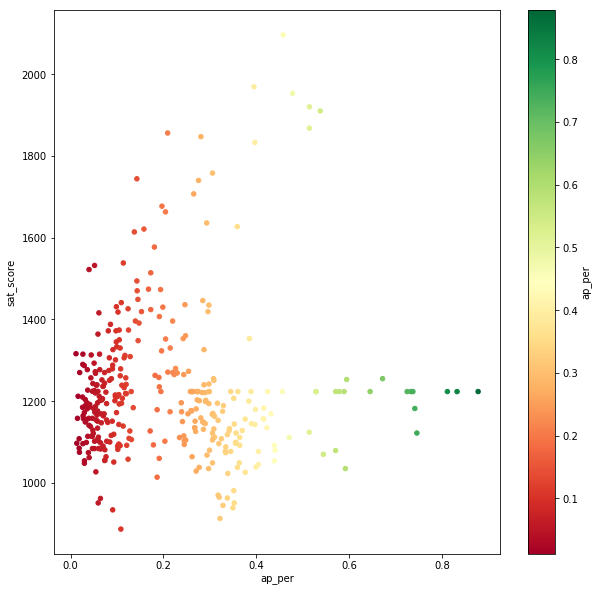

In [ ]:
combined['ap_per']= combined['ap_test_takers_']/ combined['total_enrollment']
fig, ax = plt.subplots()

combined.plot(x='ap_per', y = 'sat_score', kind= 'scatter', figsize= (10,10),\
              c= 'ap_per', colormap= 'RdYlGn', ax= ax)